## Machine Learning - Homework 2

### Question 1

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.options.display.max_rows = 8

#### 1. Find the url for the California Test Score Data Set from the following website: https://vincentarelbundock.github.io/Rdatasets/datasets.html Read through the "DOC" file to understand the variables in the dataset, then use the following url to import the data.  

In [2]:
calschool = pd.read_csv("https://vincentarelbundock.github.io/Rdatasets/csv/Ecdat/Caschool.csv")

In [3]:
calschool.head()

,Unnamed: 0,distcod,county,district,grspan,enrltot,teachers,calwpct,mealpct,computer,testscr,compstu,expnstu,str,avginc,elpct,readscr,mathscr
0,1,75119,Alameda,Sunol Glen Unified,KK-08,195,10.900000,0.510200,2.040800,67,690.799988,0.343590,6384.911133,17.889910,22.690001,0.000000,691.599976,690.000000
1,2,61499,Butte,Manzanita Elementary,KK-08,240,11.150000,15.416700,47.916698,101,661.200012,0.420833,5099.380859,21.524664,9.824000,4.583333,660.500000,661.900024
2,3,61549,Butte,Thermalito Union Elementary,KK-08,1550,82.900002,55.032299,76.322601,169,643.599976,0.109032,5501.954590,18.697226,8.978000,30.000002,636.299988,650.900024
3,4,61457,Butte,Golden Feather Union Elementary,KK-08,243,14.000000,36.475399,77.049202,85,647.700012,0.349794,7101.831055,17.357143,8.978000,0.000000,651.900024,643.500000
4,5,61523,Butte,Palermo Union Elementary,KK-08,1335,71.500000,33.108601,78.427002,171,640.849976,0.128090,5235.987793,18.671329,9.080333,13.857677,641.799988,639.900024


#### 1.1 Visualize the univariate distribution of the target feature and each of the three continuous explanatory variables that you think are likely to have a relationship with the target feature.   

From the documentation, I would tend to think `expnstu`, expenditure per student, `str`, student teacher ratio, and `avginc`, district average income, are likely to have a relationship with the target feature. A high level of expenditure per student should (we hope) result in higher test scores; a higher student-per-teacher ratio means teachers can't devote as much time and attention to specific students and could lead to lower test scores; finally, income may be a predictor of higher grades, as wealthier households are able to 'invest' in their children's education outside of school (e.g. tutoring).

It is worth noting that these variables may all be correlated.

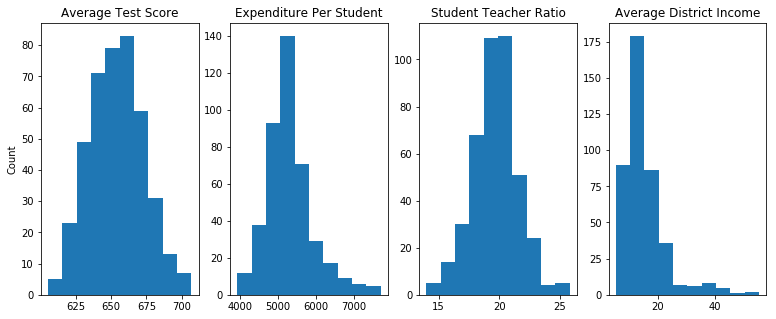

In [4]:
fig, ax = plt.subplots(1, 4, figsize = (13, 5))

ax[0].hist(calschool["testscr"])
ax[0].set_ylabel("Count")
ax[0].set_title("Average Test Score")

ax[1].hist(calschool["expnstu"])
ax[1].set_title("Expenditure Per Student")

ax[2].hist(calschool["str"])
ax[2].set_title("Student Teacher Ratio")

ax[3].hist(calschool["avginc"])
ax[3].set_title("Average District Income")

plt.show()

#### 1.2 Visualize the dependency of the target on each feature from 1.1.

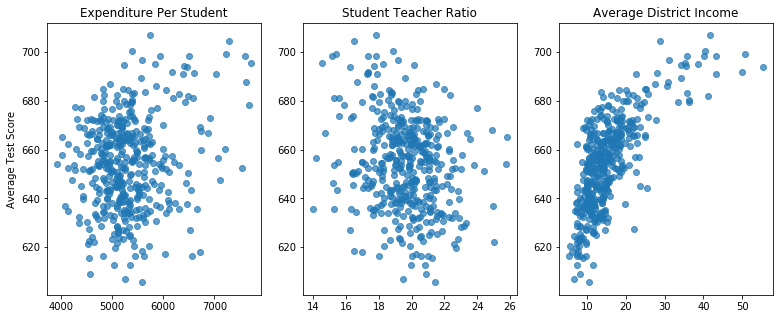

In [5]:
fig, ax = plt.subplots(1, 3, figsize = (13, 5))

ax[0].scatter(calschool["expnstu"], calschool["testscr"], alpha = 0.7)
ax[0].set_ylabel("Average Test Score")
ax[0].set_title("Expenditure Per Student")

ax[1].scatter(calschool["str"], calschool["testscr"], alpha = 0.7)
ax[1].set_title("Student Teacher Ratio")

ax[2].scatter(calschool["avginc"], calschool["testscr"], alpha = 0.7)
ax[2].set_title("Average District Income")

plt.show()

#### 1.3 Split data in training and test set. Build models that evaluate the relationship between all available X variables in the California test dataset and the target variable. Evaluate KNN for regression, Linear Regression (OLS), Ridge, and Lasso using cross-validation with the default parameters. Does scaling the data with the StandardScaler help?

First, I get rid of all non-numeric data. Second, I remove the redundant row number column found in the data set. Thirdly, I remove the readscr and mathscr variables. Since testscr is the average of the two, it seems absurd to include them in the dataframe.

In [6]:
calschool = calschool._get_numeric_data() #only keeps numeric data
calschool = calschool.iloc[:, 2:13] #select out first column, redundant row number

y = calschool['testscr'] #dep var
X = calschool.loc[:, calschool.columns != 'testscr'] #ind var

X.head() #shows new df

,enrltot,teachers,calwpct,mealpct,computer,compstu,expnstu,str,avginc,elpct
0,195,10.900000,0.510200,2.040800,67,0.343590,6384.911133,17.889910,22.690001,0.000000
1,240,11.150000,15.416700,47.916698,101,0.420833,5099.380859,21.524664,9.824000,4.583333
2,1550,82.900002,55.032299,76.322601,169,0.109032,5501.954590,18.697226,8.978000,30.000002
3,243,14.000000,36.475399,77.049202,85,0.349794,7101.831055,17.357143,8.978000,0.000000
4,1335,71.500000,33.108601,78.427002,171,0.128090,5235.987793,18.671329,9.080333,13.857677


Then I split the datasets into a testing and training data.

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

First up, I use KNN regressors and compute the MSE.

In [8]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from statistics import mean

In [9]:
kfold = KFold(n_splits=5)
print("CV Train Score: {}".format(mean(cross_val_score(KNeighborsRegressor(), X_train, y_train, cv=kfold))))
print("CV Test Score: {}".format(mean(cross_val_score(KNeighborsRegressor(), X_test, y_test, cv=kfold))))

CV Train Score: -0.05399014482377124
CV Test Score: -0.0154975309023004


In [10]:
knn = KNeighborsRegressor(n_neighbors = 5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test) 
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_knn))

Mean Squared Error: 442.215262407


In [11]:
lr = LinearRegression().fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_lr))

Mean Squared Error: 93.2497121342


In [12]:
print("CV Train Score: {:.2f}".format( np.mean(cross_val_score(LinearRegression(), X_train, y_train, cv=10, scoring="r2"))))
print("CV Test Score: {:.2f}".format( np.mean(cross_val_score(LinearRegression(), X_test, y_test, cv=10, scoring="r2"))))

CV Train Score: 0.78
CV Test Score: 0.77


The KNN Regression model clearly **greatly** underperforms the classic OLS model, but we haven't tuned any of the KNN parameters yet.

Next, I run ridge with the default settings.

In [13]:
from sklearn.linear_model import Ridge
print("CV Train Score: {:.2f}".format( np.mean(cross_val_score(Ridge(), X_train, y_train, scoring="r2"))))
print("CV Test Score: {:.2f}".format( np.mean(cross_val_score(Ridge(), X_test, y_test, scoring="r2"))))
ridge = Ridge().fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_ridge))

CV Train Score: 0.78
CV Test Score: 0.78
Mean Squared Error: 93.038988655


In [14]:
from sklearn.linear_model import Lasso
print("CV Train Score: {:.2f}".format( np.mean(cross_val_score(Lasso(), X_train, y_train, scoring="r2"))))
print("CV Test Score: {:.2f}".format( np.mean(cross_val_score(Lasso(), X_test, y_test, scoring="r2"))))
lasso = Lasso().fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_lasso))

CV Train Score: 0.78
CV Test Score: 0.80
Mean Squared Error: 93.3093850057


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increa

The R^2 (or "training/test set score") and the 'raw' MSE are roughly the same for OLS regression, lasso and ridge. Of the three, lasso has the highest test set score.

Next, I re-run OLS, ridge and lasso with standardized data (the standard scaler).

In [15]:
from sklearn import preprocessing

In [16]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [17]:
lr = LinearRegression().fit(X_train_scaled, y_train)
print("CV Train Score: {:.2f}".format( np.mean(cross_val_score(lr, X_train_scaled, y_train, scoring="r2"))))
print("CV Test Score: {:.2f}".format( np.mean(cross_val_score(lr, X_test_scaled, y_test, scoring="r2"))))

CV Train Score: 0.78
CV Test Score: 0.78


In [18]:
ridge = Ridge().fit(X_train_scaled, y_train)
print("CV Train Score: {:.2f}".format( np.mean(cross_val_score(ridge, X_train_scaled, y_train, scoring="r2"))))
print("CV Test Score: {:.2f}".format( np.mean(cross_val_score(ridge, X_test_scaled, y_test, scoring="r2"))))

CV Train Score: 0.78
CV Test Score: 0.80


In [19]:
lasso = Lasso().fit(X_train_scaled, y_train)
print("CV Train Score: {:.2f}".format( np.mean(cross_val_score(lasso, X_train_scaled, y_train, scoring="r2"))))
print("CV Test Score: {:.2f}".format( np.mean(cross_val_score(lasso, X_test_scaled, y_test, scoring="r2"))))

CV Train Score: 0.78
CV Test Score: 0.82


The training score for all three models is the same. OLS's test score improves by 0.01, and both the Ridge and Lasso *test* scores improve by 0.02.

#### 1.4 Tune the parameters of the models where possible using GridSearchCV. Do the results improve?

In [20]:
from sklearn.model_selection import GridSearchCV

In [21]:
param_grid = {'n_neighbors': np.arange(1, 30, 2)}
grid = GridSearchCV(KNeighborsRegressor(), param_grid=param_grid, cv=10)
grid.fit(X_train, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))
print("test-set score: {:.3f}".format(grid.score(X_test, y_test)))

best mean cross-validation score: 0.045
best parameters: {'n_neighbors': 27}
test-set score: 0.010


In [22]:
param_grid = {'alpha': np.arange(1, 500, 5)} 
grid = GridSearchCV(Ridge(), param_grid=param_grid, cv=10)
grid.fit(X_train, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))
print("test-set score: {:.3f}".format(grid.score(X_test, y_test)))

best mean cross-validation score: 0.782
best parameters: {'alpha': 496}
test-set score: 0.807


In [23]:
param_grid = {'alpha': np.arange(-200, 300, 12)} #goes from 0 to 100 (since 0 is linear regression)
grid = GridSearchCV(Lasso().fit(X_train, y_train), param_grid=param_grid, cv=10)
grid.fit(X_train, y_train)
best_alpha_lasso = grid.best_params_["alpha"]
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))
print("test-set score: {:.3f}".format(grid.score(X_test, y_test)))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


best mean cross-validation score: 0.782
best parameters: {'alpha': 4}
test-set score: 0.800


The KNN score improves, but is still **considerably** lower than that of any other model used for this homework. The performance of lasso and ridge does not seem to improve by much compared to the untuned models. Moreover, ridge's optimal alpha is close to the *highest* in the range provided for the gridsearch, which indicates an extremely flexible fit. Lasso's optimal alpha, on the other hand, is the smallest of the range and implies the 'optimal' lasso for this data may just be a regular OLS regression (since lasso with alpha = 0 is essentially an OLS regression and the best alpha here is 4).

(With a different range that increased in lower increments, the alpha was even closer to 0, but this generated a lot of error messages.)

In [24]:
param_grid = {'alpha': np.arange(-200, 300, 12)} 
grid = GridSearchCV(Lasso().fit(X_train_scaled, y_train), param_grid=param_grid, cv=10)
grid.fit(X_train_scaled, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))
print("test-set score: {:.3f}".format(grid.score(X_test_scaled, y_test)))

best mean cross-validation score: 0.714
best parameters: {'alpha': 4}
test-set score: 0.675


Using scaled data as an experiment seems to decrease performance dramatically when using the 'tuned' parameter.

#### 1.5 Compare the coefficients of your two best linear models (not knn), do they agree on which features are important?

Given my comment above, I believe OLS is one of the best linear models for this data. The second best would be, in my opinion, lasso, since its test score was initially the highest of all three models.

In [25]:
lr = LinearRegression().fit(X_train, y_train)
print("Intercept:", lr.intercept_, "\n", "Coefficients:", np.round(lr.coef_, 3))

Intercept: 664.199488101 
 Coefficients: [ 0.    -0.01  -0.105 -0.364  0.002 -1.501  0.002 -0.369  0.517 -0.197]


In [26]:
lasso = Lasso(alpha = best_alpha_lasso).fit(X_train, y_train)
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))
print("Coefficients:", np.round(lasso.coef_, 3))

Number of features used: 7
Coefficients: [-0.     0.    -0.034 -0.428  0.002  0.     0.003 -0.     0.365 -0.15 ]


The models agree on the first 5 features. For the 6th (compstu), Lasso sets the coefficient to 0, while OLS has a -1.5 coefficient. Lasso and OLS also produce different results for the 8th coefficient (str), which Lasso sets to 0, but is -0.369 in OLS. The models agree on the following 2 features. 

OLS might compensate for the two coefficients with which it disagrees with Lasso by having a high positive intercept. It may be interesting to compare the performance of OLS with a reduced set of coefficient (removing compstu, str, and all other set to 0) with Lasso.

#### 1.6 Discuss which final model you would choose to predict new data

For prediction purposes, I would use Lasso. Even though the optimized parameter seems to be close to 0 (thus making Lasso very close to an OLS regression), Lasso's test cross-validation is higher. 

Test cross-validation, because it is based on 'random' data which nonetheless shares distributional/statistical characteristics with the predicted variable, is, in my opinion, the best indicator of prediction performance on new data. I would also trust it over the training CV score because the latter may be biased 'upwards' due of model over-fitting.

### Question 2

#### First, import the red and the white wine csv files into separate pandas dataframes from the following website: https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/ (Note: you need to adjust the argument for read_csv() from sep=',' to sep=';') Add a new column to each data frame called "winetype".  For the white wine dataset label the values in this column with a 0, indicating white wine.  For the red wine dataset, label values with a 1, indicating red wine.  Combine both datasets into a single dataframe. The target data (i.e. the dependent variable) is "winetype".

In [27]:
redwine = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep = ";")
whitewine = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", sep = ";")

In [28]:
redwine.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5


In [29]:
whitewine.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6


In [30]:
redwine["winetype"] = 1 #adding the wine type dummy
whitewine["winetype"] = 0

In [31]:
wines = redwine.append(whitewine) #bringing both dfs together

In [32]:
wines.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,winetype
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1


In [33]:
wines.tail(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,winetype
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0
4897,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6,0


#### 2.1 Visualize the univariate distribution of the target feature and each of the three explanatory variables that you think are likely to have a relationship with the target feature.   

Based on the small sample of white v. red wines displayed above, I would guess acidity (e.g. "fixed acidity", "citric acid") and total sulfur dioxide would be good predictors of whether the wine is red or white.

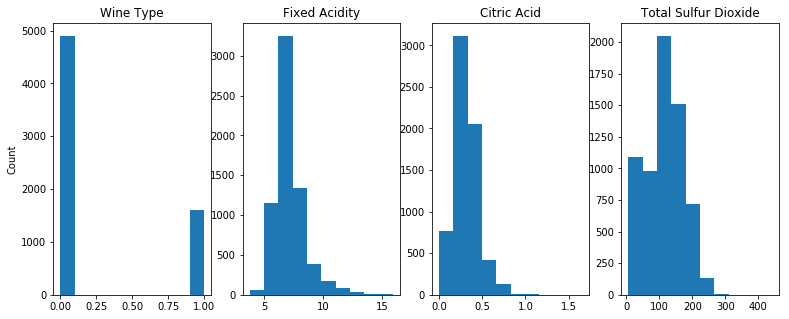

In [34]:
fig, ax = plt.subplots(1, 4, figsize = (13, 5))

ax[0].hist(wines["winetype"])
ax[0].set_ylabel("Count")
ax[0].set_title("Wine Type")

ax[1].hist(wines["fixed acidity"])
ax[1].set_title("Fixed Acidity")

ax[2].hist(wines["citric acid"])
ax[2].set_title("Citric Acid")

ax[3].hist(wines["total sulfur dioxide"])
ax[3].set_title("Total Sulfur Dioxide")

plt.show()

#### 2.2 Split data into training and test set. Build models that evaluate the relationship between all available X variables in the dataset and the target variable. Evaluate Logistic Regression, Penalized Logistic Regression, and KNN for classification using cross-validation. How different are the results? How does scaling the data with StandardScaler influence the results?

In [35]:
y = wines['winetype']
X = wines.loc[:, wines.columns != 'winetype']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 1)

In [37]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression().fit(X_train, y_train) #using default C
print("CV Training Score: {:.2f}".format( np.mean(cross_val_score(LogisticRegression(), X_train, y_train, cv=10, scoring="r2"))) )
print("CV Test Score: {:.2f}".format( np.mean(cross_val_score(LogisticRegression(), X_test, y_test, cv=10, scoring="r2"))) )

CV Training Score: 0.90
CV Test Score: 0.86


In [38]:
logreg_randomC = LogisticRegression(C = 80).fit(X_train, y_train) #picking 80 as a random C
print("CV Training Score: {:.2f}".format( np.mean(cross_val_score(logreg_randomC, X_train, y_train, cv=10, scoring="r2"))) )
print("CV Test Score: {:.2f}".format( np.mean(cross_val_score(logreg_randomC, X_test, y_test, cv=10, scoring="r2"))) )

CV Training Score: 0.94
CV Test Score: 0.91


It seems that penalized logistic regression yields a higher test and training score than unpenalized log regression.

In [39]:
from sklearn import preprocessing
from sklearn.pipeline import make_pipeline

In [40]:
pipe = make_pipeline(preprocessing.StandardScaler(), LogisticRegression()) 
pipe.fit(X_train, y_train)
print("Logistic Regression Test Score: {:.2f}".format(pipe.score(X_test, y_test)))

Logistic Regression Test Score: 0.99


In [41]:
pipe = make_pipeline(preprocessing.StandardScaler(), LogisticRegression(C = 80)) 
pipe.fit(X_train, y_train)
print("Penalized Log Reg Test Score: {:.2f}".format(pipe.score(X_test, y_test)))

Penalized Log Reg Test Score: 0.99


Using scaled data improves the log regression score dramatically, as it increases from 0.86 to 0.99. Scaled data also improves the score of our 'random' penalized log regression. The scores for the log and penalized log regression using scaled data are the same at two significant digits.

What about the KNN model?

In [42]:
from sklearn.neighbors import KNeighborsClassifier
kfold = KFold(n_splits=5)
print("CV Train Score: {}".format(mean(cross_val_score(KNeighborsClassifier(), X_train, y_train, cv=kfold))))
print("CV Test Score: {}".format(mean(cross_val_score(KNeighborsClassifier(), X_test, y_test, cv=kfold))))

CV Train Score: 0.9392445637866582
CV Test Score: 0.9341538461538462


The KNN model with 5-fold cross-validation has a higher *test* score than both log models, using our data as is. However, its performance is  lower than that of the 'transformed'/scaled penalized regression.

I therefore run the KNN model with CV and the scaled Xs:

In [43]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("CV Train Score: {}".format(mean(cross_val_score(KNeighborsClassifier(), X_train_scaled, y_train, cv=kfold))))
print("CV Test Score: {}".format(mean(cross_val_score(KNeighborsClassifier(), X_test_scaled, y_test, cv=kfold))))

CV Train Score: 0.9921998631074607
CV Test Score: 0.9883076923076923


The CV test score is *slightly* lower than that of the penalized log regression but this difference is barely noticeable. (The score is identical when rounded upwards to two significant digits).

Using our data as is, KNN delivers the best test score. However, when using scaled data, all three models have comparable performance.

#### 2.3 Tune the parameters where possible using GridSearchCV. Do the results improve?

I first try to find the optimal C for the penalized log regression.

In [44]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': np.arange(0.1, 100, 5)} #goes from >0 to 100 (since 100 was baseline)

grid = GridSearchCV(LogisticRegression(), param_grid=param_grid, cv=10)

#use meta model methods to fit score and predict model:
grid.fit(X_train, y_train)

#extract best score and parameter by calling objects "best_score_" and "best_params_"
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))
print("test-set score: {:.3f}".format(grid.score(X_test, y_test)))

best mean cross-validation score: 0.989
best parameters: {'C': 75.099999999999994}
test-set score: 0.986


In [45]:
best_C = grid.best_params_["C"]

In [46]:
logreg_bestC = LogisticRegression(C = best_C).fit(X_train, y_train) #using best C
print("CV Training Score: {:.2f}".format( np.mean(cross_val_score(logreg_bestC, X_train, y_train, cv=10, scoring="r2"))) )
print("CV Test Score: {:.2f}".format( np.mean(cross_val_score(logreg_bestC, X_test, y_test, cv=10, scoring="r2"))) )

CV Training Score: 0.94
CV Test Score: 0.92


The score is close to the one we had before for the penalized log regression, but that is because my random pick of 80 as C turned out to be pretty close from the optimal C. 

In [47]:
pipe = make_pipeline(preprocessing.StandardScaler(), LogisticRegression(C = grid.best_params_["C"])) 
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.99015384615384616

The score when using standardized variables isn't much of an improvement over our C = 80 model. Partly, again, because my random pick of 80 as C turned out to be pretty close from the optimal C.

What about the KNN model?

In [48]:
param_grid = {'n_neighbors': np.arange(1, 30, 2)}
grid = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid, cv=10)
grid.fit(X_train, y_train)

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))
print("test-set score: {:.3f}".format(grid.score(X_test, y_test)))

best mean cross-validation score: 0.947
best parameters: {'n_neighbors': 1}
test-set score: 0.945


The optimized-K KNN model is slightly higher than the test set score we had using the default number of Ks (K = 5).

In [49]:
best_k = grid.best_params_['n_neighbors']

In [50]:
print("CV Train Score: {}".format(mean(cross_val_score(KNeighborsClassifier(n_neighbors = best_k), X_train_scaled, y_train, cv=kfold))))
print("CV Test Score: {}".format(mean(cross_val_score(KNeighborsClassifier(n_neighbors = best_k), X_test_scaled, y_test, cv=kfold))))

CV Train Score: 0.9954842310324856
CV Test Score: 0.9876923076923076


The performance between the K=5 and optimized-K KNN models using scaled Xs is essentially the same (the optimized K has +0.003 for the train score, +0.0006 for the test score).

It therefore seems that using **scaled** Xs improved the performances of *all* models more than optimizing the parameters did.

#### 2.4 Change the cross-validation strategy in GridSearchCV from ‘stratified k-fold’ to ‘kfold’ with shuffling. Do the parameters for models that can be tuned change? Do they change if you change the random seed of the shuffling? Or if you change the random state of the split into training and test data?

First, I change the CV strategy to 'Stratified Shuffle Split'. Shuffle split is a variation of both shuffle split and stratified k-fold, which shuffles the data and splits it into training and testing sets *while* ensuring the same proportion of the training classes remains within each set (https://scikit-learn.org/stable/modules/cross_validation.html#stratified-shuffle-split). I chose to use it here because we have many more white wines than red wines in our sample, which could create an imbalance when using Shuffle Split.

In [51]:
from sklearn.model_selection import StratifiedShuffleSplit

In [52]:
param_grid = {'C': np.arange(0.1, 100, 5)} 

grid = GridSearchCV(LogisticRegression(), param_grid=param_grid, cv= StratifiedShuffleSplit(random_state=1))
grid.fit(X_train, y_train)
print("best parameters: {}".format(grid.best_params_))

best parameters: {'C': 90.099999999999994}


In [53]:
param_grid = {'n_neighbors': np.arange(1, 30, 2)}
grid = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid, cv= StratifiedShuffleSplit(random_state=1))
grid.fit(X_train, y_train)
print("best parameters: {}".format(grid.best_params_))

best parameters: {'n_neighbors': 1}


Running the same as the above with a different random state:

In [54]:
param_grid = {'C': np.arange(0.1, 100, 5)} 

grid = GridSearchCV(LogisticRegression(), param_grid=param_grid, cv= StratifiedShuffleSplit(random_state=16))
grid.fit(X_train, y_train)
print("best parameters: {}".format(grid.best_params_))

best parameters: {'C': 50.100000000000001}


In [55]:
param_grid = {'n_neighbors': np.arange(1, 30, 2)}
grid = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid, cv= StratifiedShuffleSplit(random_state=16))
grid.fit(X_train, y_train)
print("best parameters: {}".format(grid.best_params_))

best parameters: {'n_neighbors': 1}


It appears that the best parameter for *restricted* logistic changes quite a bit depending on the random state of the data, while the best parameter for KNN seems to be the same throughout.

Now I will change the initial split into test and training data.

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 16)

In [57]:
param_grid = {'C': np.arange(0.1, 100, 5)} 

grid = GridSearchCV(LogisticRegression(), param_grid=param_grid, cv= StratifiedShuffleSplit(random_state=1))
grid.fit(X_train, y_train)
print("best parameters: {}".format(grid.best_params_))

best parameters: {'C': 65.099999999999994}


In [58]:
param_grid = {'n_neighbors': np.arange(1, 30, 2)}
grid = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid, cv= StratifiedShuffleSplit(random_state=1))
grid.fit(X_train, y_train)
print("best parameters: {}".format(grid.best_params_))

best parameters: {'n_neighbors': 1}


Again, the optimal C for the restricted log regression changes, while the best KNN K is still 1.

####  2.5 Lastly, compare the coefficients for Logistic Regression and Penalized Logistic Regression and discuss which final model you would choose to predict new data.

In [59]:
logreg = LogisticRegression().fit(X_train, y_train)
logreg .coef_

array([[ 0.7076832 ,  8.34793194, -0.8058879 , -0.19271191,  1.78847403,
         0.04926673, -0.06318921, -2.19856328,  1.86260312,  6.6644163 ,
        -0.75285824, -0.23426152]])

In [60]:
param_grid = {'C': np.arange(0.1, 100, 5)} 
grid = GridSearchCV(LogisticRegression(), param_grid=param_grid, cv= StratifiedShuffleSplit(random_state=1))
grid.fit(X_train, y_train)
best_C = grid.best_params_["C"]
logreg_constr = LogisticRegression(C = best_C).fit(X_train, y_train)
logreg_constr .coef_

array([[  1.27493827,  12.8405613 ,  -0.32024785,  -0.20161657,
         13.21054373,   0.05571334,  -0.06572226, -15.05600353,
          6.96560334,   9.98489719,  -0.64852792,  -0.1351493 ]])

Overall, our coefficients all have the same signs. They can vary in magnitude quite a bit. 

I would pick the logistic regression using standardized coefficients. It fared just as well as the other models in terms of test score, does not seem to vary dramatically with the cross-validation method or random state and is easier to interpret than KNN.